<a href="https://colab.research.google.com/github/haoboooo/Pretrained-CNN-Binary-Classification-in-Skin-Cancer/blob/main/skin_cancer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the library of kaggle
!pip install kaggle

In [ ]:
import json
token = {"username":"haoboxu","key":"9cac2e577f5875ae376eece6b11cdd49"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [ ]:
# 创建文件夹保存密钥
!mkdir -p ~/.kaggle

In [ ]:
# 复制json到路径下
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
# 修改权限确保后续操作正常
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 指定数据集保存的位置
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
# download the dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 94% 305M/325M [00:03<00:00, 82.9MB/s]
100% 325M/325M [00:03<00:00, 105MB/s] 


In [ ]:
!unzip /content/datasets/fanconic/skin-cancer-malignant-vs-benign/skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # build layer
from tensorflow.keras.models import Sequential # build model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # preprocessing data

import numpy as np #matrices operation
import os
import matplotlib.pyplot as plt #draw diagram
import PIL
from PIL import Image
import pathlib

In [ ]:
#parameters (changing)
train_dir = '/content/train'
test_dir = '/content/test'
batch_size = 64
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
#data augmentation
#preprocessing data

train_image_generator = ImageDataGenerator(rescale=1./255,#归一化
                                           horizontal_flip=True, #图片翻转, augmentation technology
                                           width_shift_range=.15, #宽变化
                                           height_shift_range=.15, #高变化
                                           rotation_range=45,#旋转45度
                                           zoom_range=0.5 #缩放0.5倍
)
test_image_generator = ImageDataGenerator(rescale=1./255) #test dataset without augmentation

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,#训练集路径
                                                           shuffle=True, #打乱图片顺序
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),#修改图片尺寸
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_dir,#测试集路径
                                                             target_size=(IMG_HEIGHT,IMG_WIDTH), #修改图片尺寸
                                                             class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


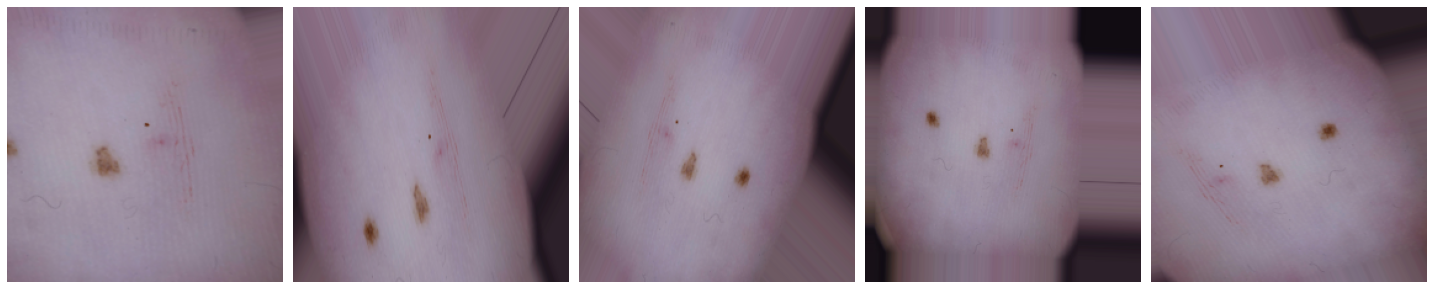

In [ ]:
# plot images we obtain using plt library
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augemted_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augemted_images)

In [ ]:
##### build our Inception3 model #####
model_incep = tf.keras.applications.InceptionV3(input_shape=(299,299,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

Inception3 = tf.keras.Sequential([
    model_incep,
    DROP,
    global_average_layer,
    prediction_layer                 
])

In [ ]:
##### compile our Inception3 model #####
Inception3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##### train our Inception3 model #####
history = Inception3.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
42/42 [==============================] - 2638s 63s/step - loss: 0.5459 - accuracy: 0.7577 - val_loss: 0.8816 - val_accuracy: 0.3621
Epoch 2/10
42/42 [==============================] - 2553s 61s/step - loss: 0.4183 - accuracy: 0.7952 - val_loss: 5.1998 - val_accuracy: 0.5455
Epoch 3/10
42/42 [==============================] - 2548s 61s/step - loss: 0.4161 - accuracy: 0.7994 - val_loss: 4.5699 - val_accuracy: 0.5455
Epoch 4/10
42/42 [==============================] - 2549s 61s/step - loss: 0.3956 - accuracy: 0.8187 - val_loss: 4.3033 - val_accuracy: 0.5455
Epoch 5/10
42/42 [==============================] - 2551s 61s/step - loss: 0.3980 - accuracy: 0.8066 - val_loss: 4.4068 - val_accuracy: 0.5455
Epoch 6/10
42/42 [==============================] - 2566s 61s/step - loss: 0.3765 - accuracy: 0.8297 - val_loss: 2.4877 - val_accuracy: 0.5470
Epoch 7/10
42/42 [==============================] - 2613s 62s/step - loss: 0.3693 - accuracy: 0.8282 - val_loss: 2.9025 - val_accuracy: 0.5470

In [ ]:
##### build our Inception_3 model #####
model_inception = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

Inception_3 = tf.keras.Sequential([
    model_inception,
    DROP,
    global_average_layer,
    prediction_layer                 
])

##### compile our Inception_3 model #####
Inception_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

##### train our Inception_3 model #####
history = Inception_3.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
42/42 [==============================] - 1441s 34s/step - loss: 0.5628 - accuracy: 0.7600 - val_loss: 2.4702 - val_accuracy: 0.5455
Epoch 2/15
42/42 [==============================] - 1398s 33s/step - loss: 0.4058 - accuracy: 0.8047 - val_loss: 3.0064 - val_accuracy: 0.5455
Epoch 3/15
42/42 [==============================] - 1412s 34s/step - loss: 0.4121 - accuracy: 0.8013 - val_loss: 3.2125 - val_accuracy: 0.5455
Epoch 4/15
42/42 [==============================] - 1425s 34s/step - loss: 0.3869 - accuracy: 0.8187 - val_loss: 1.8198 - val_accuracy: 0.5455
Epoch 5/15
42/42 [==============================] - 1437s 34s/step - loss: 0.3839 - accuracy: 0.8210 - val_loss: 0.9239 - val_accuracy: 0.5530
Epoch 6/15
42/42 [==============================] - 1430s 34s/step - loss: 0.4152 - accuracy: 0.8111 - val_loss: 0.6975 - val_accuracy: 0.5970
Epoch 7/15
42/42 [==============================] - 1427s 34s/step - loss: 0.4001 - accuracy: 0.8085 - val_loss: 0.5727 - val_accuracy: 0.6667

In [ ]:
##### build our preInception3 model #####
model_preinception = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

preInception3 = tf.keras.Sequential([
    model_preinception,
    DROP,
    global_average_layer,
    prediction_layer                 
])

##### compile our preInception3 model #####
preInception3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

##### train our preInception3 model #####
history = preInception3.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

87924736/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
42/42 [==============================] - 1306s 31s/step - loss: 0.4565 - accuracy: 0.7873 - val_loss: 514.3461 - val_accuracy: 0.5455
Epoch 2/15
42/42 [==============================] - 1300s 31s/step - loss: 0.4148 - accuracy: 0.8066 - val_loss: 2.1321 - val_accuracy: 0.5106
Epoch 3/15
42/42 [==============================] - 1305s 31s/step - loss: 0.3204 - accuracy: 0.8453 - val_loss: 5.2236 - val_accuracy: 0.6227
Epoch 4/15
42/42 [==============================] - 1294s 31s/step - loss: 0.3302 - accuracy: 0.8548 - val_loss: 0.4448 - val_accuracy: 0.7864
Epoch 5/15
42/42 [==============================] - 1306s 31s/step - loss: 0.3197 - accuracy: 0.8582 - val_loss: 0.5485 - val_accuracy: 0.7924
Epoch 6/15
42/42 [==============================] - 1328s 32s/step - loss: 0.2946 - accuracy: 0.8661 - val_loss: 0.4115 - val_accuracy: 0.8182
Epoch 7/15
42/42 [==============================] - 1286s 31s/step - loss: 0.2713 - accuracy: 0.8730 - val_loss: 0.4132 - val_accuracy: 0.85